In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

In [2]:
File_path = '/bettik/bouissob/ISOMIP+/'

In [3]:
os.listdir(File_path)[:5]

['Ocean4_COM_MITgcm_JPL.nc',
 'Ocean1_TYP_FVCOM.nc',
 'Ocean4_COM_POP2x.nc',
 'Ocean3_COM_MITgcm_BAS_Coupled_V3.nc',
 'Ocean2_COM_MITgcm_BAS.nc']

In [4]:
Data_Name = 'Ocean1_COM_NEMO-CNRS.nc'
Data = xr.open_dataset(File_path + Data_Name)

In [8]:
Data2 = Data.assign_coords({'nx': Data.x,
                           'ny': Data.y,
                           'nz': Data.z,
                           'nTime': Data.time})


In [20]:
Data2['temperatureYZ'].isel(ny=0,nTime=0).interp({'nz': -150})#.dropna('nz')#.interp({'nz': -4.})

<xarray.DataArray 'temperatureYZ' ()>
array(nan)
Coordinates:
    ny       float32 1e+03
    nTime    object 0000-01-01 00:00:00
    nz       int64 -150
Attributes:
    description:  temperature slice in y-z plane through x = 500 km
    units:        deg C

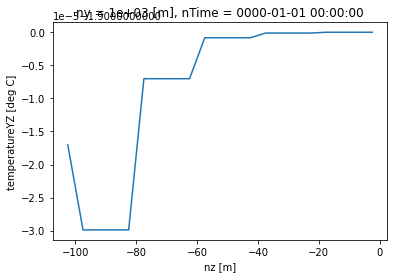

In [21]:
Data2['temperatureYZ'].isel(ny=0,nTime=0).plot()

In [ ]:
Data.iceDraft

In [6]:
Time_step = len(Data.nTime)

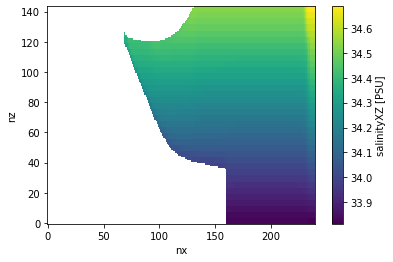

In [7]:
Data.salinityXZ[2, :, :].plot()

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [ ]:
Data_Type = "salinityXZ"
fig, ax = plt.subplots(figsize=(5, 4))
x = Data[Data_Type].nx.as_numpy()
z = Data[Data_Type].nz.as_numpy()
cax = ax.pcolormesh(x, z, Data[Data_Type][0, :, :],
                    vmin=float(Data[Data_Type].min()), vmax=float(Data[Data_Type].max()), cmap='Blues')
fig.colorbar(cax)
def animate(i):
    cax.set_array(np.array(Data[Data_Type][i, :, :]).flatten())
    ax.set_title("Time = {} step".format(i))

anim = FuncAnimation(
    fig, animate, interval=50, frames= Time_step)
HTML(anim.to_html5_video())

In [ ]:
Data_Type = "salinityYZ"
fig, ax = plt.subplots(figsize=(5, 4))
y = Data[Data_Type].ny.as_numpy()
z = Data[Data_Type].nz.as_numpy()
cax = ax.pcolormesh(y, z, Data[Data_Type][0, :, :],
                    vmin=float(Data[Data_Type].min()), vmax=float(Data[Data_Type].max()), cmap='Blues')
fig.colorbar(cax)
def animate(i):
    cax.set_array(np.array(Data[Data_Type][i, :, :]).flatten())
    ax.set_title("Time = {} step".format(i))

anim2 = FuncAnimation(
    fig, animate, interval=50, frames= Time_step)
HTML(anim2.to_html5_video())

In [ ]:
Data_Type = "meltRate"
fig, ax = plt.subplots(figsize=(5, 4))
x = Data[Data_Type].nx.as_numpy()
y = Data[Data_Type].ny.as_numpy()
cax = ax.pcolormesh(x, y, Data[Data_Type][0, :, :],
                    vmin=float(Data[Data_Type].min()), vmax=float(Data[Data_Type].max()), cmap='Blues')
fig.colorbar(cax)
def animate(i):
    cax.set_array(np.array(Data[Data_Type][i, :, :]).flatten())
    ax.set_title("Time = {} step".format(i))

anim3 = FuncAnimation(
    fig, animate, interval=50, frames= Time_step)
HTML(anim3.to_html5_video())

In [9]:
Data

<xarray.Dataset>
Dimensions:                    (nTime: 240, ny: 40, nx: 240, nz: 144)
Dimensions without coordinates: nTime, ny, nx, nz
Data variables: (12/25)
    barotropicStreamfunction   (nTime, ny, nx) float32 ...
    salinityYZ                 (nTime, nz, ny) float32 ...
    temperatureYZ              (nTime, nz, ny) float32 ...
    salinityXZ                 (nTime, nz, nx) float32 ...
    temperatureXZ              (nTime, nz, nx) float32 ...
    bottomSalinity             (nTime, ny, nx) float32 ...
    ...                         ...
    time                       (nTime) object 0000-01-01 00:00:00 ... 0019-12...
    uBoundaryLayer             (nTime, ny, nx) float32 ...
    vBoundaryLayer             (nTime, ny, nx) float32 ...
    x                          (nx) float32 3.21e+05 3.23e+05 ... 7.99e+05
    y                          (ny) float32 1e+03 3e+03 ... 7.7e+04 7.9e+04
    z                          (nz) float32 -2.5 -7.5 -12.5 ... -712.5 -717.5
Attributes: (12/19)
    experiment:                      ISOMIP+ COM_EXP1
    contact:                         nicolas.jourdain@univ-grenoble-alpes.fr
    institute:                       IGE-CNRS, Grenoble, France
    model:                           NEMO_3.6 (trunk r6402)
    repository:                      http://www.nemo-ocean.eu
    vertical_coordinates:            Z* (variable-volume levels with partial ...
    ...                              ...
    equation_of_state:               linear
    GammaT:                          0.026
    GammaS:                          0.000742857
    Cd:                              0.0025
    original_name:                   EXP1publi
    version:                         1.1 (bug on surface freshwater correctio...

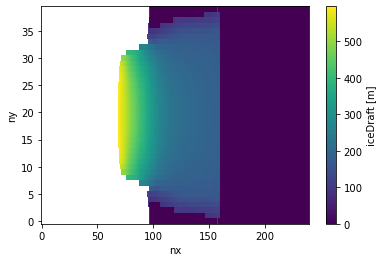

In [10]:
Data.iceDraft.plot()

In [11]:
Data.meltRate

<xarray.DataArray 'meltRate' (nTime: 240, ny: 40, nx: 240)>
[2304000 values with dtype=float32]
Dimensions without coordinates: nTime, ny, nx
Attributes:
    description:  melt rate, positive for melting
    units:        m/s

In [14]:
Data.attrs

{'experiment': 'ISOMIP+ COM_EXP1',
 'contact': 'nicolas.jourdain@univ-grenoble-alpes.fr',
 'institute': 'IGE-CNRS, Grenoble, France',
 'model': 'NEMO_3.6 (trunk r6402)',
 'repository': 'http://www.nemo-ocean.eu',
 'vertical_coordinates': 'Z* (variable-volume levels with partial steps)',
 'momentum_advection': 'flux form - 3rd order UBS',
 'tracer_advection': '3rd order UBS and 2nd order FCT on the vertical',
 'lateral_diffusion_for_momentum': 'Laplacian, along geopotential (horizontal)',
 'lateral_diffusion_for_tracers': 'Laplacian, along iso-neutral',
 'vertical_diffusion': 'Constant eddy diffusivity',
 'convection': 'enhanced vertical diffusivity and viscosity (0.1 m2/s)',
 'top_mixed_layer': 'T,S,u are averaged over the top 20m',
 'equation_of_state': 'linear',
 'GammaT': 0.026,
 'GammaS': 0.000742857,
 'Cd': 0.0025,
 'original_name': 'EXP1publi',
 'version': '1.1 (bug on surface freshwater correction in v1.0)'}